
🏆 EU BANKING B2 COMPLIANCE LEADERBOARD (sorted by Avg_Score)
Rank Bank                 Avg Score  Compliant %  Pages 
----------------------------------------------------------------------
1    Argenta B2 Accessi   76.6%      76.2%        1674  
2    Keytrade B2 Access   73.7%      63.1%        2723  
3    Beobank B2 Accessi   72.9%      57.5%        1972  
4    All Crelan Fr B2 A   71.3%      69.8%        696   
5    Bnp Paribas Fortis   70.6%      49.3%        3953  
6    Belfius B2 Accessi   69.9%      48.2%        1827  
7    Ing B2 Accessibili   63.6%      19.7%        3699  

🏆 EU BANKING B2 COMPLIANCE LEADERBOARD (sorted by Compliance_Rate)
Rank Bank                 Avg Score  Compliant %  Pages 
----------------------------------------------------------------------
1    Argenta B2 Accessi   76.6%      76.2%        1674  
2    All Crelan Fr B2 A   71.3%      69.8%        696   
3    Keytrade B2 Access   73.7%      63.1%        2723  
4    Beobank B2 Accessi   72.9%      57.5%  

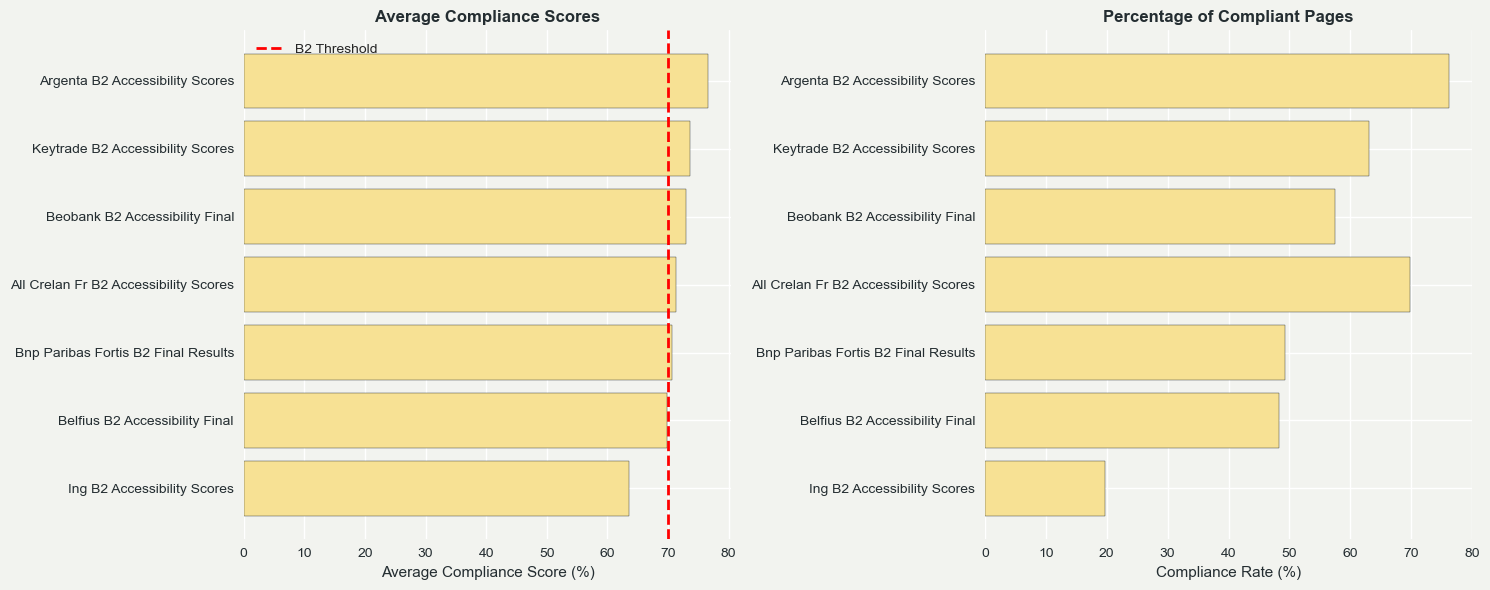

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Sailpeak colors
COLORS = {
    'bg': '#F2F3EF',
    'dark': '#242D31', 
    'accent': '#F7E194'
}

def load_bank_leaderboard(data_folder='data'):
    """Load all bank files and create leaderboard"""
    
    all_data = []
    
    # Load all Excel/CSV files
    for file_path in Path(data_folder).glob('*.xlsx'):
        bank_name = file_path.stem.replace('_', ' ').title()
        
        df = pd.read_excel(file_path)
        df['bank_name'] = bank_name
        all_data.append(df)
    
    # Combine all data
    combined = pd.concat(all_data, ignore_index=True)
    
    # Filter out 0s and 100s
    combined = combined[(combined['Compliance Level'] > 0) & (combined['Compliance Level'] < 100)]
    
    # Create leaderboard
    leaderboard = combined.groupby('bank_name').agg({
        'Compliance Level': ['mean', lambda x: (x >= 70).mean() * 100, 'count']
    }).round(1)
    
    leaderboard.columns = ['Avg_Score', 'Compliance_Rate', 'Total_Pages']
    leaderboard = leaderboard.reset_index()
    
    return leaderboard.sort_values('Avg_Score', ascending=False)

def display_leaderboard(df, sort_by='Avg_Score'):
    """Display formatted leaderboard"""
    
    df_sorted = df.sort_values(sort_by, ascending=False).reset_index(drop=True)
    df_sorted.index += 1  # Start ranking from 1
    
    print(f"\n🏆 EU BANKING B2 COMPLIANCE LEADERBOARD (sorted by {sort_by})")
    print("="*70)
    print(f"{'Rank':<4} {'Bank':<20} {'Avg Score':<10} {'Compliant %':<12} {'Pages':<6}")
    print("-"*70)
    
    for i, row in df_sorted.iterrows():
        rank = i
        bank = row['bank_name'][:18]  # Truncate long names
        score = f"{row['Avg_Score']:.1f}%"
        compliance = f"{row['Compliance_Rate']:.1f}%"
        pages = int(row['Total_Pages'])
        
        print(f"{rank:<4} {bank:<20} {score:<10} {compliance:<12} {pages:<6}")

def plot_leaderboard(df):
    """Create visual leaderboard with Sailpeak colors"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.patch.set_facecolor(COLORS['bg'])
    
    # Sort by average score
    df_sorted = df.sort_values('Avg_Score', ascending=True)
    
    # Chart 1: Average Scores
    bars1 = ax1.barh(df_sorted['bank_name'], df_sorted['Avg_Score'], 
                     color=COLORS['accent'], edgecolor=COLORS['dark'])
    ax1.axvline(x=70, color='red', linestyle='--', linewidth=2, label='B2 Threshold')
    ax1.set_xlabel('Average Compliance Score (%)', color=COLORS['dark'])
    ax1.set_title('Average Compliance Scores', color=COLORS['dark'], fontweight='bold')
    ax1.set_facecolor(COLORS['bg'])
    ax1.legend()
    
    # Chart 2: Compliance Rates  
    bars2 = ax2.barh(df_sorted['bank_name'], df_sorted['Compliance_Rate'],
                     color=COLORS['accent'], edgecolor=COLORS['dark'])
    ax2.set_xlabel('Compliance Rate (%)', color=COLORS['dark'])
    ax2.set_title('Percentage of Compliant Pages', color=COLORS['dark'], fontweight='bold')
    ax2.set_facecolor(COLORS['bg'])
    
    # Style both charts
    for ax in [ax1, ax2]:
        ax.tick_params(colors=COLORS['dark'])
        ax.spines['bottom'].set_color(COLORS['dark'])
        ax.spines['left'].set_color(COLORS['dark'])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Usage
def create_leaderboard():
    """Main function to create leaderboard"""
    
    # Load data
    leaderboard = load_bank_leaderboard()
    
    # Display all sortable views
    display_leaderboard(leaderboard, 'Avg_Score')
    display_leaderboard(leaderboard, 'Compliance_Rate') 
    display_leaderboard(leaderboard, 'Total_Pages')
    
    # Create visualizations
    plot_leaderboard(leaderboard)
    
    return leaderboard

# Run it
df = create_leaderboard()